In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import matplotlib.cm as cm
from scipy.io import loadmat
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from numpy import random
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X = loadmat("data/lab7/ex7data1.mat")["X"]
scaler = StandardScaler()
X = scaler.fit_transform(X)

<IPython.core.display.Javascript object>


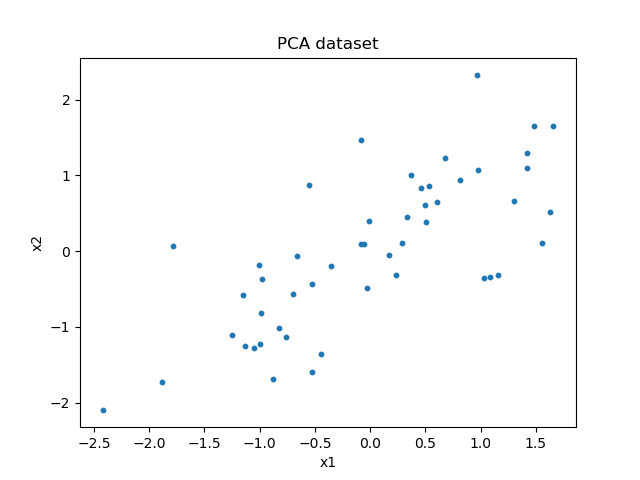

In [3]:
fig, ax = plt.subplots()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("PCA dataset")
ax.scatter(X[:, 0], X[:, 1],  s=10)

In [4]:
def get_covarince_matrix(X):
    n, m=X.shape
    X_mean=np.mean(X, axis=0)
    cov_matrix=np.zeros((m, m))
    for i in range(n):
        x=X[i, :]
        cov_matrix=cov_matrix+np.matmul((x-X_mean).reshape(m, 1), (x-X_mean.T).reshape(1, m))
    return cov_matrix/n

In [5]:
X_cov=get_covarince_matrix(X)

In [6]:
U, s, Vh = linalg.svd(X_cov)

<IPython.core.display.Javascript object>


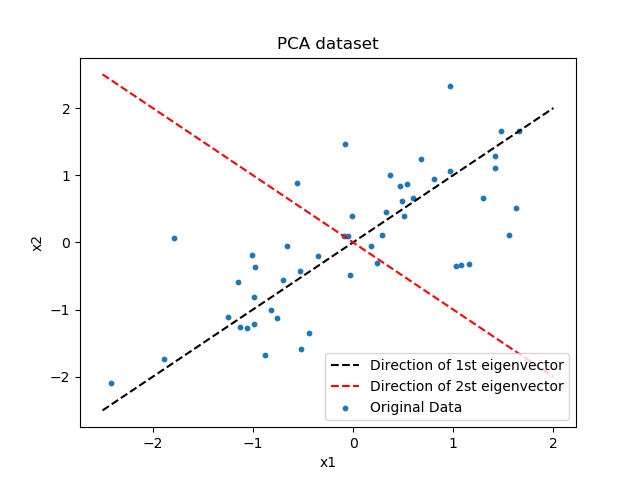

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("PCA dataset")
ax.scatter(X[:, 0], X[:, 1], label="Original Data", s=10)
linspace=np.linspace(-2.5, 2, 10)

vec1=U[:, 0]
vec2=U[:, 1]
vec_1_y=[(vec1[1]/vec1[0])*x for x in linspace]
vec_2_y=[(vec2[1]/vec2[0])*x for x in linspace]
ax.plot(linspace, vec_1_y, 
        color="black", linestyle="--", label="Direction of 1st eigenvector")
ax.plot(linspace, vec_2_y, 
        color="red", linestyle="--", label="Direction of 2st eigenvector")
ax.legend(loc="lower right")

In [11]:
def convert_to_lower(X, U, k):
    n, m=X.shape
    Z=np.zeros((n, k))
    convertion_matr=U[:, :k]
    for i in range(n):
        x=X[i, :]
        Z[i, :]=np.matmul(convertion_matr.T, x)
    return Z

def convert_to_upper(Z, U, k):
    n, m=Z.shape
    X=np.zeros((n, U.shape[0]))
    convertion_matrix=U[:, :k]
    for i in range(n):
        z=Z[i, :]
        X[i, :]=np.matmul(convertion_matrix, z)
    return X
        

In [12]:
X_lower=convert_to_lower(X, U, 1)
X_approx=convert_to_upper(X_lower, U, 1)

<IPython.core.display.Javascript object>


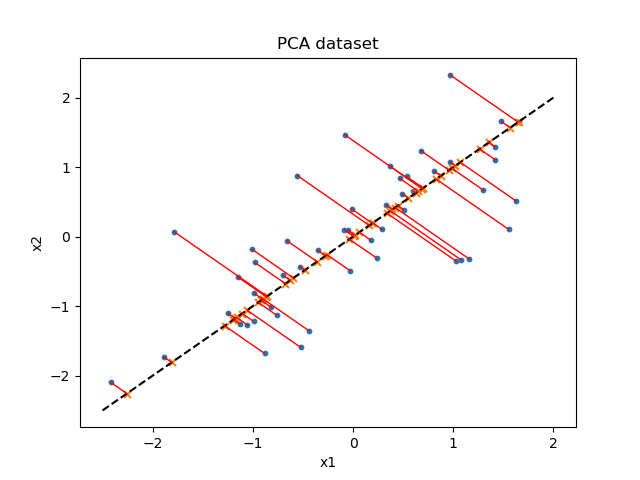

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("PCA dataset")
ax.scatter(X[:, 0], X[:, 1], label="Original Data", s=10)
ax.scatter(X_approx[:, 0], X_approx[:, 1], label="Converted Data", s=25, marker="x")
ax.plot(linspace, vec_1_y, 
        color="black", linestyle="--", label="Direction of 1st eigenvector")
for x, x_approx in zip(X, X_approx):
    ax.plot([x[0], x_approx[0]], [x[1], x_approx[1]], 
        color="red", lw=1)

In [15]:
faces = loadmat("data/lab7/ex7faces.mat")["X"]

<IPython.core.display.Javascript object>


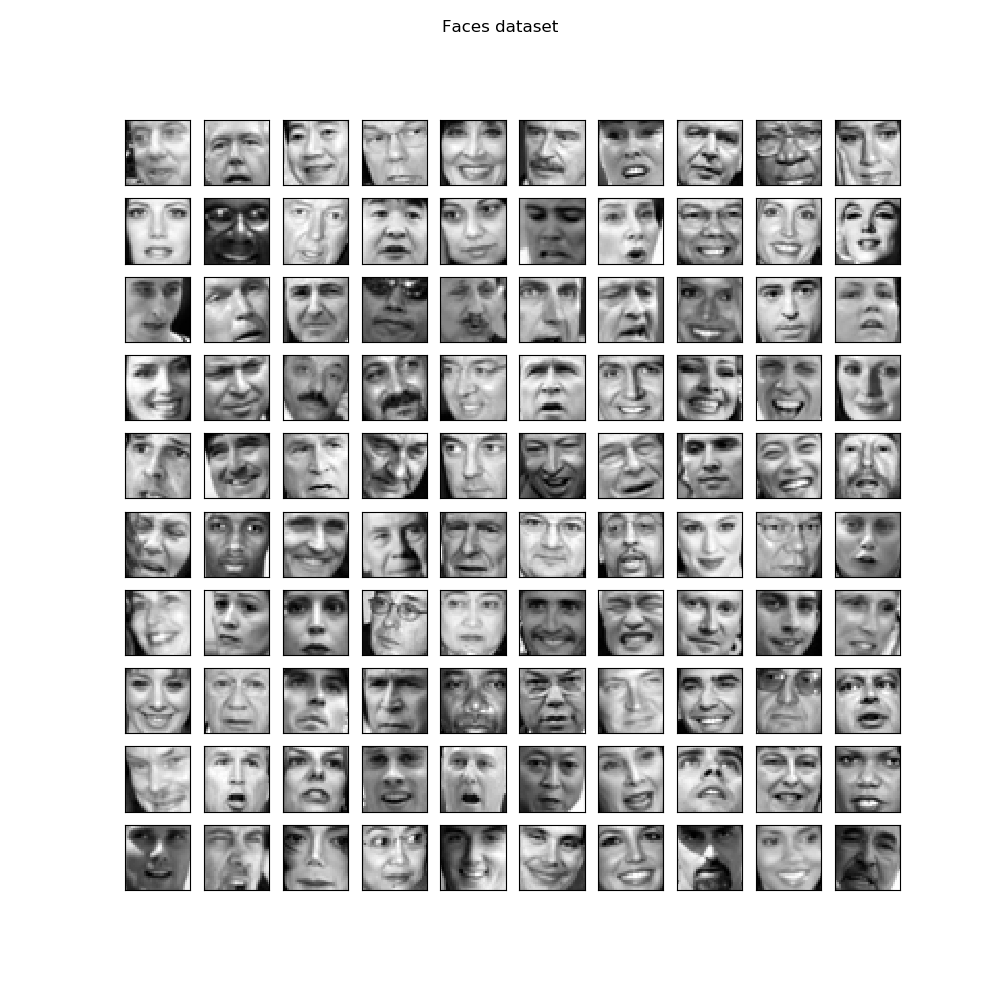

In [16]:
def plot_faces(faces):
    face_idxs = random.choice(np.arange(0, len(faces)), 100, replace=False)
    fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(10,10)) 
    fig.suptitle("Faces dataset")
    axs = axs.flatten()
    graymap = plt.get_cmap("gray")
    for i, idx in enumerate(face_idxs):
        im_mat = np.reshape(faces[idx, :], (32, 32), order="F")
        axs[i].imshow(im_mat, cmap=graymap, interpolation="None")
        axs[i].xaxis.set_visible(False)
        axs[i].yaxis.set_visible(False)
plot_faces(faces)

In [17]:
faces = scaler.fit_transform(faces)

In [18]:
faces_cov=get_covarince_matrix(faces)
U, s, Vh = linalg.svd(faces_cov)
faces_converted_36=convert_to_lower(faces, U, 36)
faces_approx_36=convert_to_upper(faces_converted_36, U, 36)

<IPython.core.display.Javascript object>


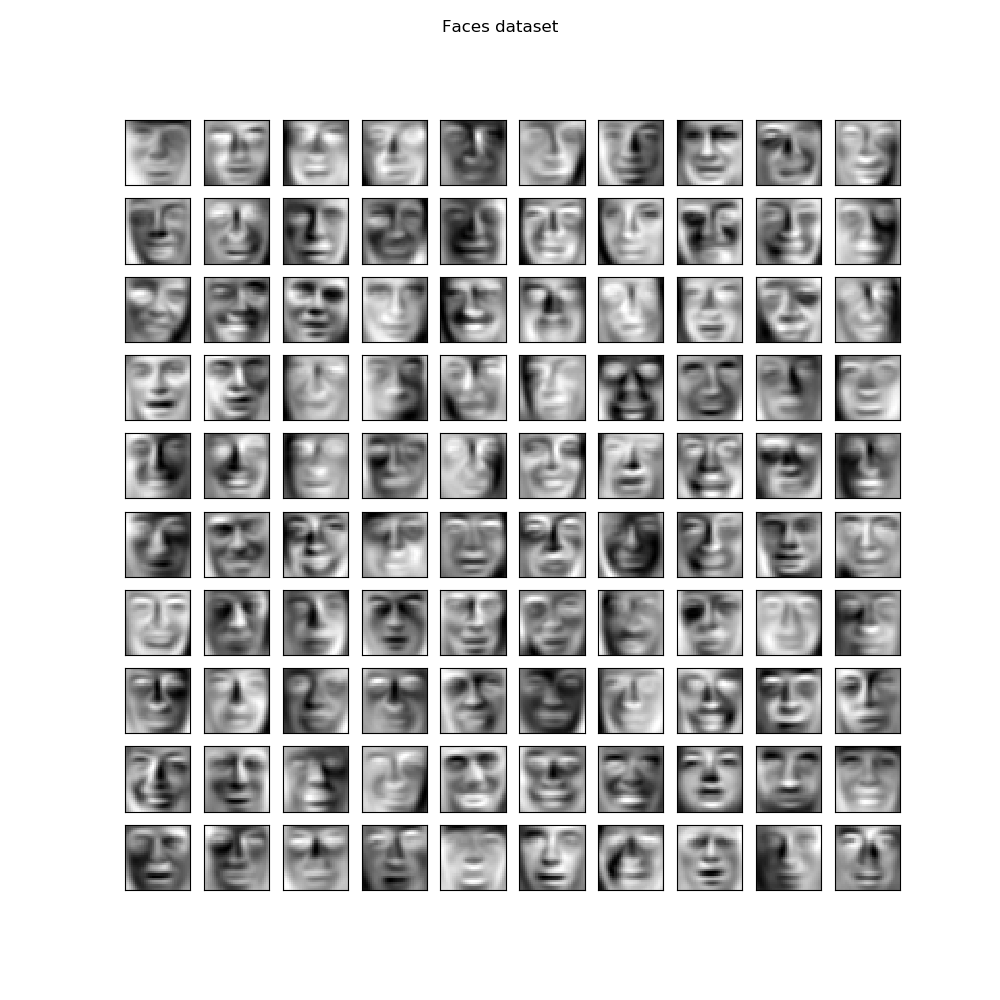

In [19]:
plot_faces(faces_approx_36)

<IPython.core.display.Javascript object>


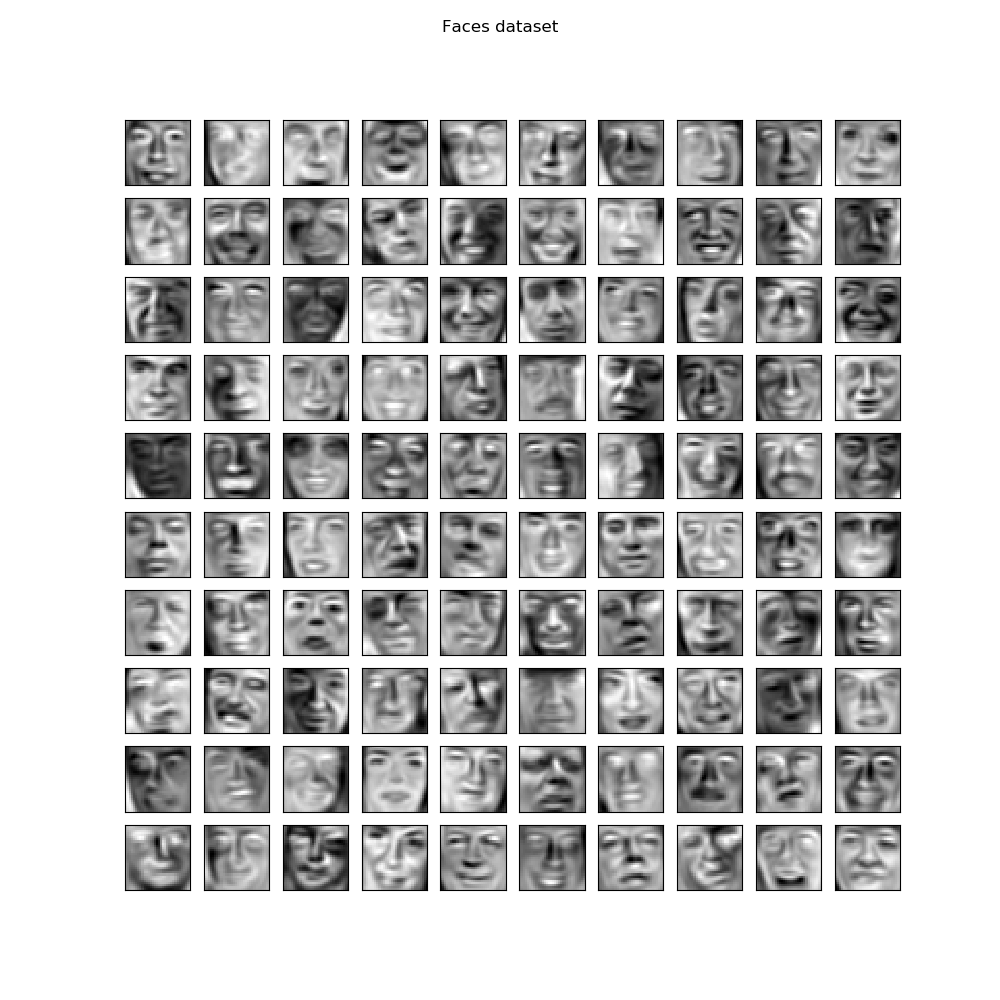

In [20]:
faces_converted_100=convert_to_lower(faces, U, 100)
faces_approx_100=convert_to_upper(faces_converted_100, U, 100)
plot_faces(faces_approx_100)

<IPython.core.display.Javascript object>


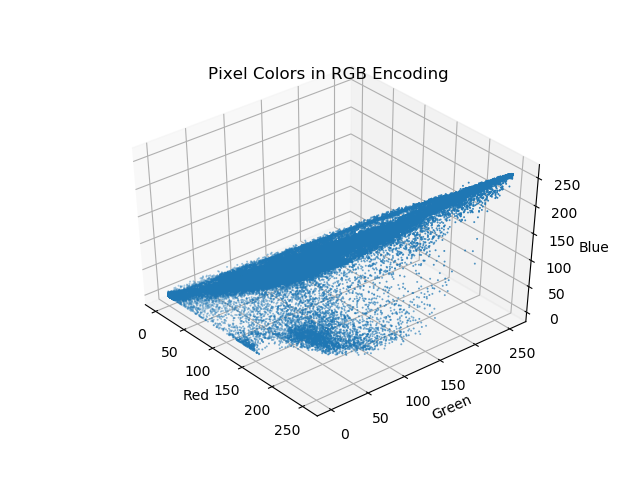

In [21]:
fratercula_jpg=Image.open("data/Lab6/fratercula.jpg")
fratercula_image = np.array(fratercula_jpg)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.set_title("Pixel Colors in RGB Encoding")
ax.scatter(fratercula_image[:, :, 0], fratercula_image[:, :, 1], zs=fratercula_image[:, :, 2], s=2, lw=0)

In [29]:
fratercula_image=fratercula_image.reshape(396*500,3)
fratercula_cov=get_covarince_matrix(fratercula_image)
U, s, Vh = linalg.svd(fratercula_cov)
fratercula_converted=convert_to_lower(fratercula_image, U, 2)
fratercula_approx=convert_to_upper(fratercula_converted, U, 2)

<IPython.core.display.Javascript object>


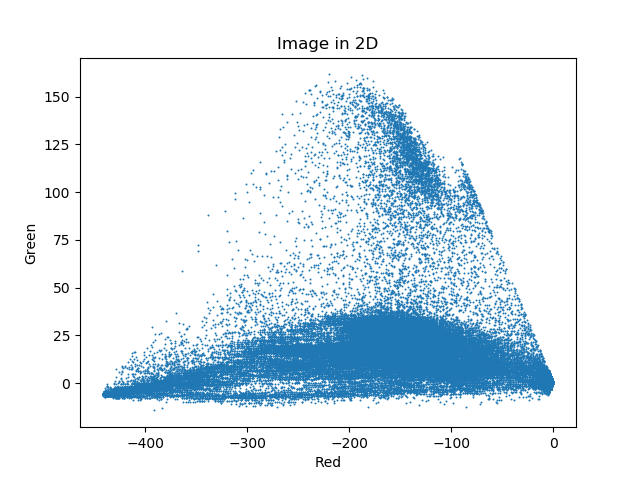

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_title("Image in 2D")
ax.scatter(fratercula_converted[:, 0], fratercula_converted[:, 1], s=2, lw=0)